In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import ast
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re
import pickle
from itertools import combinations

In [41]:
results_df = pd.read_csv('models/all_results_df.csv')
df = pd.read_csv('../data/cleaned_car_price_prediction_door_fix.csv')
df['HasTurbo'] = df['HasTurbo'].astype(int)
df.columns = [re.sub(' ', '_', col) for col in df.columns]
df.columns = [re.sub('\.', '', col) for col in df.columns]
x_cols = df.columns[1:]
df = df.sample(n=2000, random_state=42) # select a subset

<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
/var/folders/ch/3dlffsls30b_x0vlx25fgykm0000gn/T/ipykernel_57225/1605229687.py:5: SyntaxWarning: invalid escape sequence '\.'
  df.columns = [re.sub('\.', '', col) for col in df.columns]


In [55]:
####### Change the number of models shown

In [56]:
### If you want to change the number of models shown, just delete everything else that you don't want to show!!
best_models = {
    'MSE': results_df.sort_values('MSE').iloc[0],
    '5-Fold CV MSE': results_df.sort_values('5-Fold_CV MSE').iloc[0],
    '10-Fold CV MSE': results_df.sort_values('10-Fold_CV MSE').iloc[0],
    'AIC': results_df.sort_values('AIC').iloc[0],
    'BIC': results_df.sort_values('BIC').iloc[0],
    'Adjusted R^2': results_df.sort_values('Adjusted R^2', ascending=False).iloc[0],
    'PRESS': results_df.sort_values('PRESS').iloc[0]
}

In [57]:
#########

In [58]:
# Function to create formula from predictors
def create_formula(predictors_str):
    # Convert string representation of list to actual list
    predictors = ast.literal_eval(predictors_str)
    
    formula = "Price ~ " + " + ".join([f"C({p})" if df[p].dtype == 'object' else p for p in predictors])
    return formula

# Create formulas for each best model
best_formulas = {criterion: create_formula(model['Predictors']) for criterion, model in best_models.items()}

In [53]:
# Assuming df is your original DataFrame with all the data
fitted_models = {}

for criterion, formula in best_formulas.items():
    model = smf.ols(formula, data=df).fit()
    fitted_models[criterion] = model

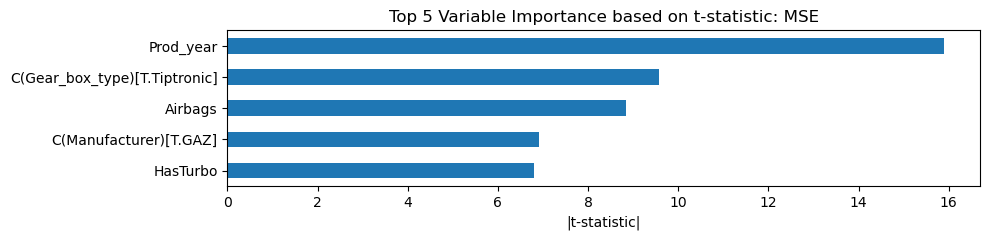

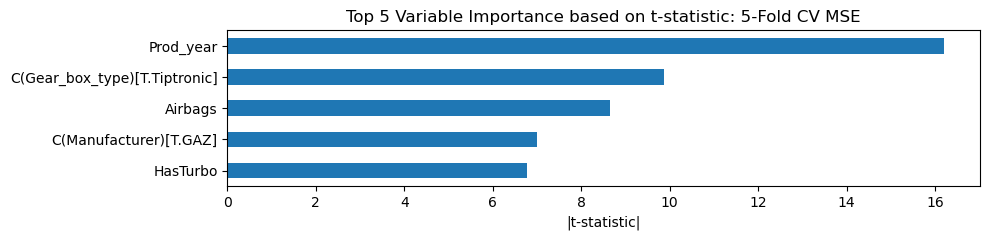

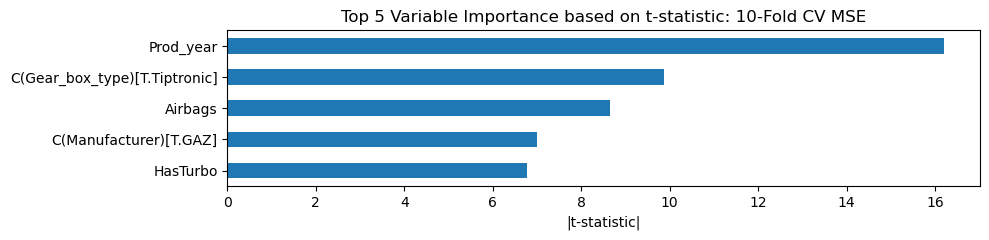

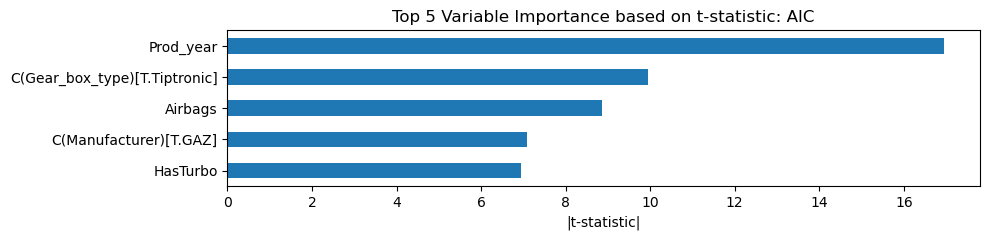

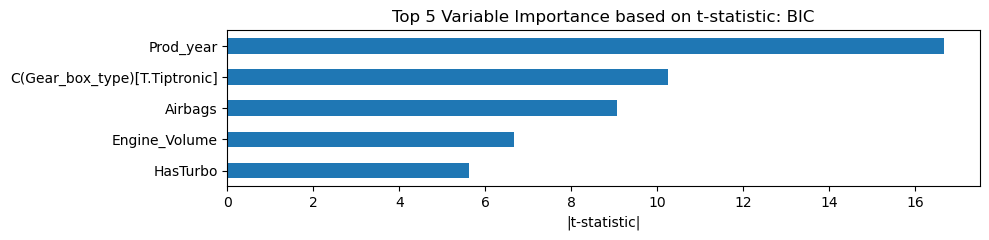

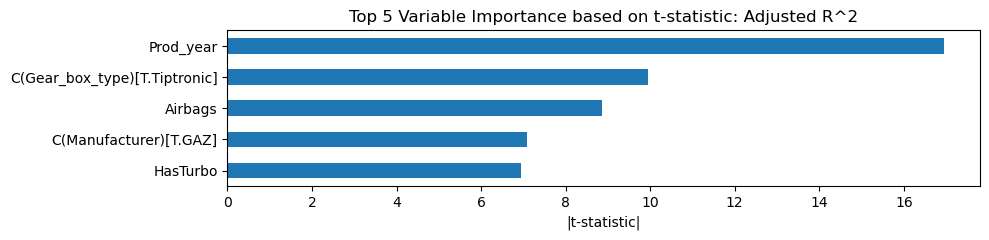

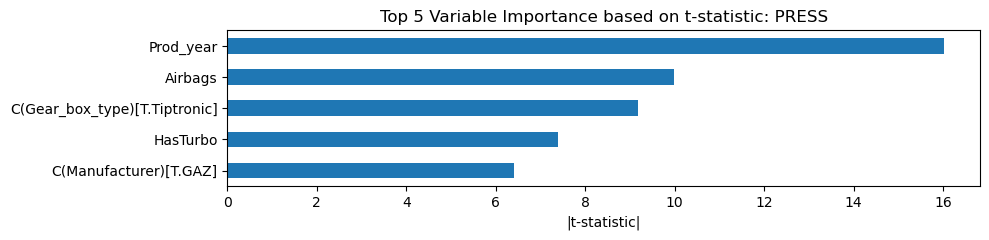

In [54]:
#Function to plot top n variable importance

def plot_variable_importance(model, title, n=5):
    importance = abs(model.tvalues)[1:]  # Exclude intercept
    importance = importance.sort_values(ascending=True)  # Sort ascending for horizontal bar plot
    
    if n is not None and n > 0:
        importance = importance.tail(n)  # Get the n highest values
    
    plt.figure(figsize=(10, min(20, 0.5 * len(importance))))
    importance.plot(kind='barh')
    plt.title(f'Top {n if n else "All"} Variable Importance based on t-statistic: {title}')
    plt.xlabel('|t-statistic|')
    plt.tight_layout()
    plt.show()

# Create plots for each model
for criterion, model in fitted_models.items():
    plot_variable_importance(model, criterion, n=5)  # Plot top 10 predictors